In [8]:
import glob
import F21Stats as f21stats
import F21DataLoader as dl
import f21_predict_base as base
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps as cm

import importlib 
importlib.reload(dl)
importlib.reload(f21stats)
importlib.reload(base)

def load_dataset(datafiles, psbatchsize=100, ps_bins=None, limitsamplesize=None):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=False, ps_bins=None, limitsamplesize=limitsamplesize, scale_ps=True)#, limitsamplesize=4)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    #print(f'{results.keys()}')
    all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    all_ps = results['ps']
    ps_std = results['ps_std']
    all_params = results['params']

    print(f"\nCombined data shape: {all_los.shape}")
    print(f"Combined parameters shape: {all_params.shape}")
    return (all_params, all_freq, all_los, all_ps, all_ks, ps_std)


In [3]:

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.0*_xHI*uGMRT*_8kHz*500h*.dat")
files10sn.extend(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-0*_xHI*uGMRT*_8kHz*500h*.dat"))
files10sn.extend(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX0*_xHI*uGMRT*_8kHz*500h*.dat"))
files10sn.extend(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX1*_xHI*uGMRT*_8kHz*500h*.dat"))
print(f"total len of file list={len(files10sn)}")
params10sn_b10, freq10sn_b10, los10sn_b10, ps10sn_b10, ks10sn_b10, psstd10sn_b10 = load_dataset(files10sn, psbatchsize=10, limitsamplesize=100, ps_bins=None)
print(f"Loaded data from files with PS computation: ps shape={ps10sn_b10.shape}")
ks10sn_bin_b10, ps10sn_bin_b10 = f21stats.logbin_power_spectrum_by_k(ks10sn_b10, ps10sn_b10)
print(f"Shape of PS data after binning={ps10sn_bin_b10.shape}")

params10sn_b100, freq10sn_b100, los10sn_b100, ps10sn_b100, ks10sn_b100, psstd10sn_b100 = load_dataset(files10sn, psbatchsize=100, limitsamplesize=1000, ps_bins=None)
print(f"Loaded data from files with PS computation: ps shape={ps10sn_b10.shape}")
ks10sn_bin_b100, ps10sn_bin_b100 = f21stats.logbin_power_spectrum_by_k(ks10sn_b100, ps10sn_b100)
print(f"Shape of PS data after binning={ps10sn_bin_b100.shape}")

total len of file list=219

Combined data shape: (2190, 2762)
Combined parameters shape: (2190, 2)
Loaded data from files with PS computation: ps shape=(2190, 1382)
Shape of PS data after binning=(2190, 16)

Combined data shape: (2190, 2762)
Combined parameters shape: (2190, 2)
Loaded data from files with PS computation: ps shape=(2190, 1382)
Shape of PS data after binning=(2190, 16)


In [4]:

files10so=glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.0*_xHI*_8kHz*.dat")
files10so.extend(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-0*_xHI*_8kHz*.dat"))
files10so.extend(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX0*_xHI*_8kHz*.dat"))
files10so.extend(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX1*_xHI*_8kHz*.dat"))
print(f"total len of file list={len(files10sn)}")
params10so_b10, freq10so_b10, los10so_b10, ps10so_b10, ks10so_b10, psstd10so_b10 = load_dataset(files10so, psbatchsize=10, limitsamplesize=100, ps_bins=None)
print(f"Loaded data from files with PS computation: ps shape={ps10sn_b10.shape}")
ks10so_bin_b10, ps10so_bin_b10 = f21stats.logbin_power_spectrum_by_k(ks10so_b10, ps10so_b10)
print(f"Shape of PS data after binning={ps10so_bin_b10.shape}")

params10so_b100, freq10so_b100, los10so_b100, ps10so_b100, ks10so_b100, psstd10so_b100 = load_dataset(files10so, psbatchsize=100, limitsamplesize=1000, ps_bins=None)
print(f"Loaded data from files with PS computation: ps shape={ps10sn_b10.shape}")
ks10so_bin_b100, ps10so_bin_b100 = f21stats.logbin_power_spectrum_by_k(ks10so_b100, ps10so_b100)
print(f"Shape of PS data after binning={ps10so_bin_b100.shape}")

total len of file list=219

Combined data shape: (2190, 2762)
Combined parameters shape: (2190, 2)
Loaded data from files with PS computation: ps shape=(2190, 1382)
Shape of PS data after binning=(2190, 16)

Combined data shape: (2190, 2762)
Combined parameters shape: (2190, 2)
Loaded data from files with PS computation: ps shape=(2190, 1382)
Shape of PS data after binning=(2190, 16)


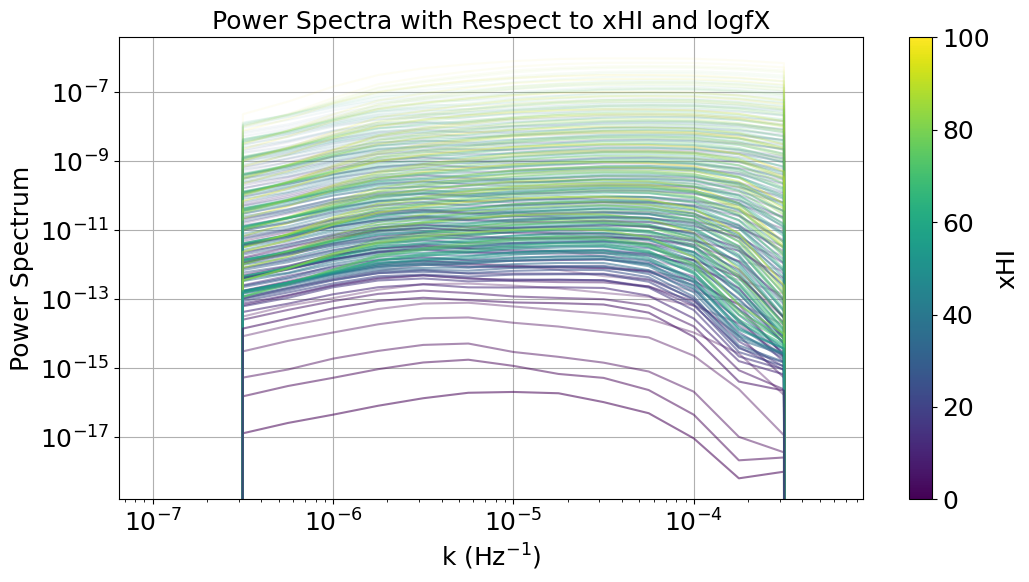

In [77]:

# Create the plot
base.initplt()

# Create a colormap for logfX
cmap = cm.get_cmap('viridis') 

# Create a scatter plot to hold the color mapping
sc = plt.scatter([], [], c=[], cmap=cmap, vmin=0, vmax=100, alpha=1)  # Placeholder for colorbar

ks = ks10so_bin[0]
for i, (ps, params) in enumerate(zip(ps10so_bin, params10so)):
    # Adjust alpha based on xHI (0.25 is more opaque, 0.50 is more transparent)
    xHI = params[0]
    #if xHI > 0.5: continue
    logfX = params[1]
    alpha = 0.3+logfX/4.0
    plt.plot(ks, ps, color=cmap(xHI), alpha=alpha)

plt.title('Power Spectra with Respect to xHI and logfX')
plt.xlabel('k (Hz$^{-1}$)')
plt.ylabel('Power Spectrum')
plt.xscale('log')  # Optional: log scale for x-axis
plt.yscale('log')  # Optional: log scale for y-axis
plt.colorbar(sc, label='xHI')  # Add colorbar with label

plt.grid()
plt.show()

In [26]:
(paramsn, freqn, losn, psn, ksn, psstdn) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1, limitsamplesize=None)
print(f"psn_bin.shape={psn.shape}")
ksn_bin, psn_bin = f21stats.logbin_power_spectrum_by_k(ksn, psn)
psn_bin_mean = np.mean(psn_bin, axis=0)
psn_bin_std = np.std(psn_bin, axis=0)



Combined data shape: (1000, 2762)
Combined parameters shape: (1000, 2)
psn_bin.shape=(1000, 1382)


filter: (2190, 16)
Found 10 rows for 0.96, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.8, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.61, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.52, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.46, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.3, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.2, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.11, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.64, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.34, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.24, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.14, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.74, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.35, 1.0
(10, 16) (16,)
fil

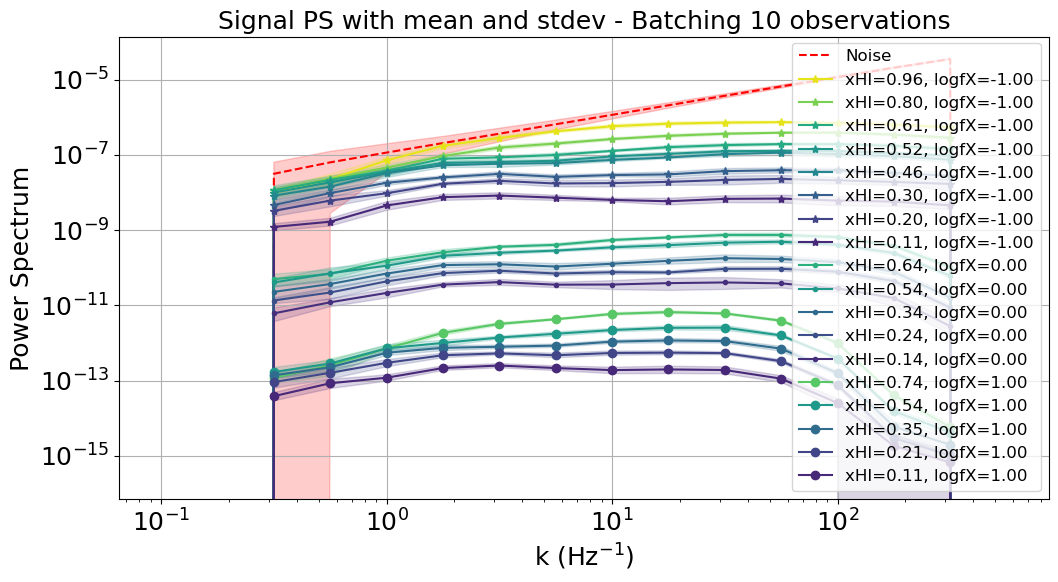

filter: (2190, 16)
Found 10 rows for 0.96, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.8, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.61, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.52, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.46, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.3, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.2, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.11, -1.0
(10, 16) (16,)


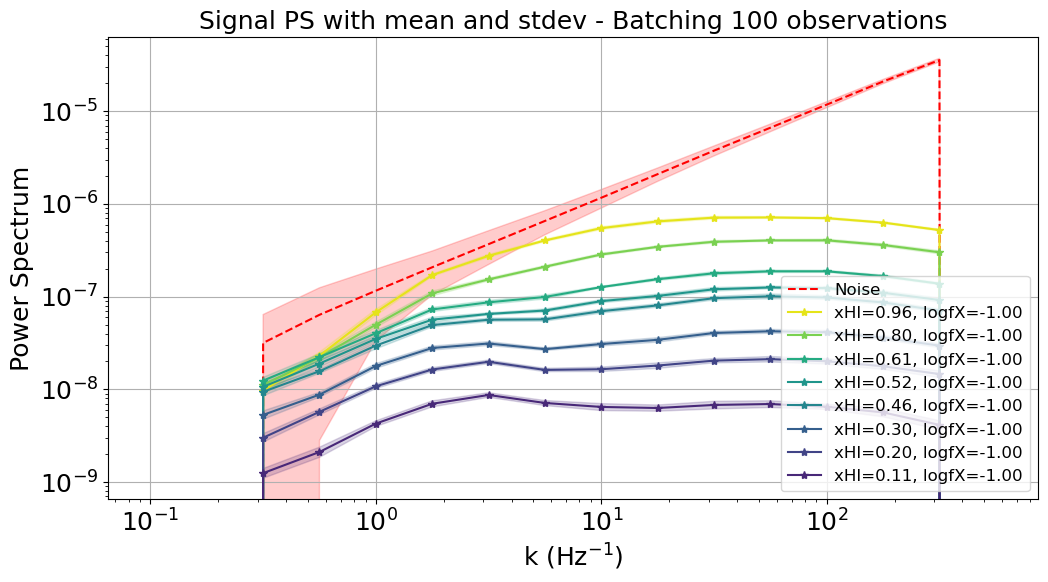

In [38]:
def plot(ks, ps, params, xHI_set, logfX_set, title, remove_k_scaling=False):
    # Create a scatter plot to hold the color mapping
    #sc = plt.scatter([], [], c=[], cmap=cmap, vmin=0, vmax=1, alpha=1)  # Placeholder for colorbar
    if remove_k_scaling:
        ps /= ks
    
    psn_bin_mean_1 = psn_bin_mean
    psn_bin_std_1 = psn_bin_std
    if remove_k_scaling:
        psn_bin_mean_1 = psn_bin_mean/ks
        psn_bin_std_1 = psn_bin_std/ks
        
    cmap = cm.get_cmap('viridis') 
    #Plot the noise
    plt.plot(ks*1e6, psn_bin_mean_1, "r--", label='Noise')
    plt.fill_between(ks*1e6, psn_bin_mean_1 - psn_bin_std_1, psn_bin_mean_1 + psn_bin_std_1, color='red', alpha=0.2) 

    for xHI, logfX in zip(xHI_set, logfX_set):
        ps_set = filter(ps, params, xHI, logfX)
        color=cmap(xHI)
        label=f'xHI={xHI:.2f}, logfX={logfX:.2f}'

        print(f"{ps_set.shape} {ks.shape}")
        ps_mean = np.mean(ps_set, axis=0)
        ps_std = np.std(ps_set, axis=0)
        marker='o'
        if logfX < 0.1: marker = '.'
        if logfX < -0.9: marker = '*'
        plt.plot(ks*1e6, ps_mean, color=color, alpha=1, label=label, marker=marker)
        plt.fill_between(ks*1e6, ps_mean - ps_std, ps_mean + ps_std, color=color, alpha=0.2) 
    plt.title(title)
    plt.xlabel('k (Hz$^{-1}$)')
    plt.ylabel('Power Spectrum')
    plt.xscale('log')  
    if not remove_k_scaling:
        plt.yscale('log')  
    #plt.colorbar(sc, label='xHI')  # Add colorbar with label
    plt.legend(fontsize=12, loc='lower right')
    plt.grid()
    plt.show()

def filter(ps, params, xHI, logfX):
    print(f'filter: {ps.shape}')
    ps_coll = []
    for row_ps, row_params in zip(ps, params):
        row_xHI = f'{row_params[0]:.2f}'
        row_logfX =  f'{row_params[1]:.2f}'
        if row_xHI == f'{xHI:.2f}' and row_logfX == f'{logfX:.2f}':
            ps_coll.append(row_ps)
    
    print(f"Found {len(ps_coll)} rows for {xHI}, {logfX}")
    return np.array(ps_coll)

# Create the plot
base.initplt()

plot(ks10so_bin_b10[0], ps10so_bin_b10, params10so_b10, [0.96, 0.80, 0.61, 0.52, 0.46, 0.30, 0.20, 0.11, 0.64, 0.54, 0.34, 0.24, 0.14, 0.74, 0.54, 0.35, 0.21, 0.11], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0], title='Signal PS with mean and stdev - Batching 10 observations')
plot(ks10so_bin_b100[0], ps10so_bin_b100, params10so_b100, [0.96, 0.80, 0.61, 0.52, 0.46, 0.30, 0.20, 0.11], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], title='Signal PS with mean and stdev - Batching 100 observations')


filter: (2190, 16)
Found 10 rows for 0.96, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.8, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.61, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.52, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.46, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.3, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.2, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.11, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.64, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.34, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.24, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.14, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.74, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.35, 1.0
(10, 16) (16,)
fil

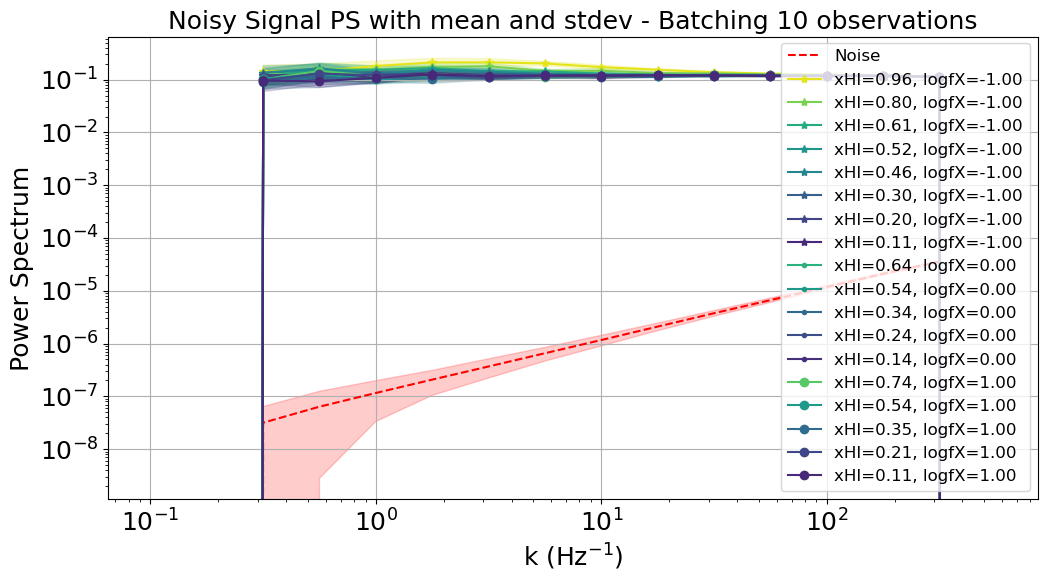

filter: (2190, 16)
Found 10 rows for 0.96, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.8, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.61, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.52, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.46, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.3, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.2, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.11, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.64, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.34, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.24, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.14, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.74, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.35, 1.0
(10, 16) (16,)
fil

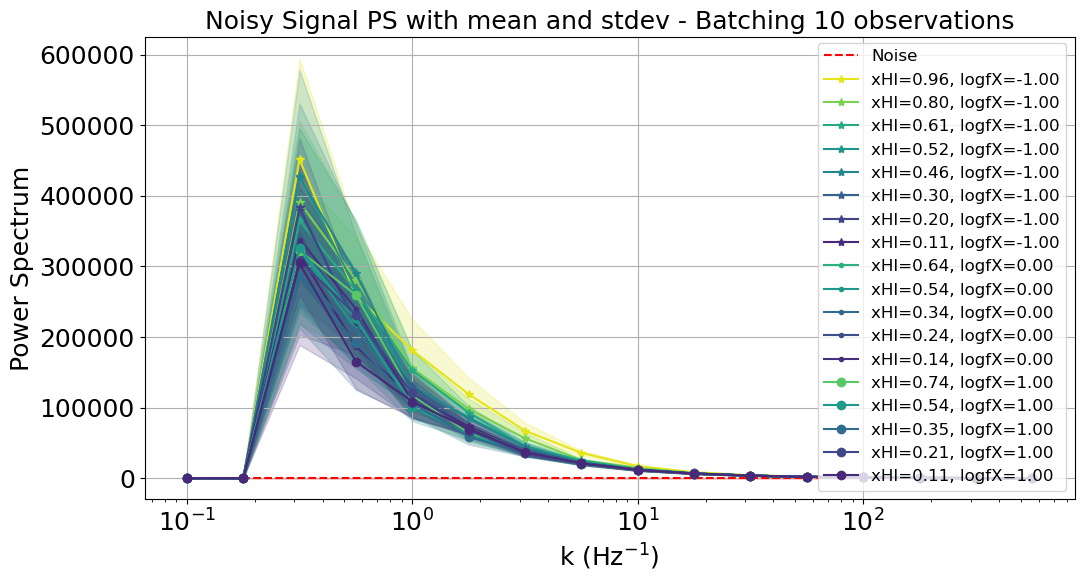

filter: (2190, 16)
Found 10 rows for 0.96, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.8, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.61, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.52, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.46, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.3, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.2, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.11, -1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.64, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.34, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.24, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.14, 0.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.74, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.54, 1.0
(10, 16) (16,)
filter: (2190, 16)
Found 10 rows for 0.35, 1.0
(10, 16) (16,)
fil

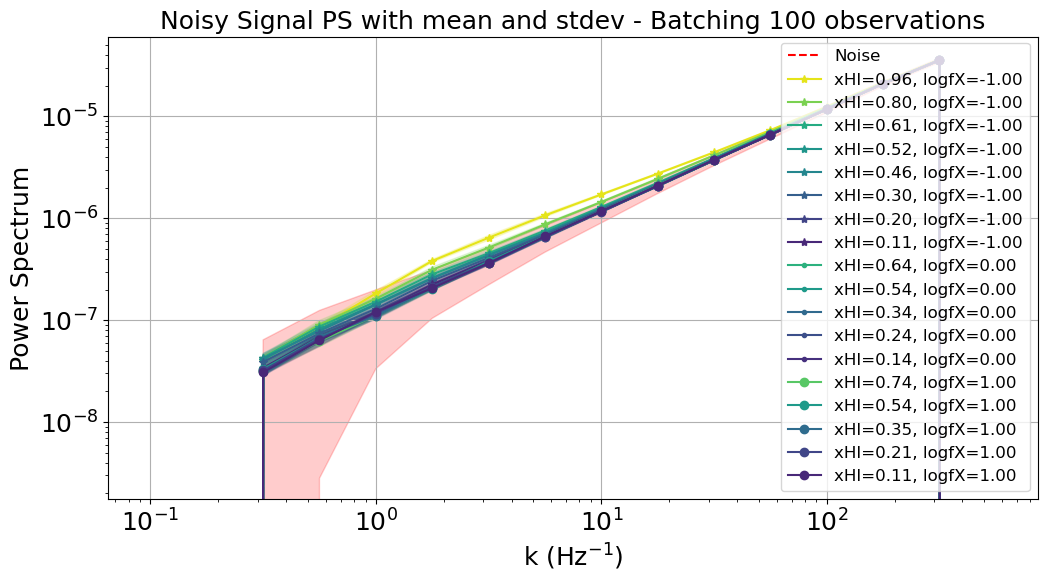

In [39]:
plot(ks10sn_bin_b10[0], ps10sn_bin_b10, params10sn_b10, [0.96, 0.80, 0.61, 0.52, 0.46, 0.30, 0.20, 0.11, 0.64, 0.54, 0.34, 0.24, 0.14, 0.74, 0.54, 0.35, 0.21, 0.11], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],  title='Noisy Signal PS with mean and stdev - Batching 10 observations')
plot(ks10sn_bin_b10[0], ps10sn_bin_b10, params10sn_b10, [0.96, 0.80, 0.61, 0.52, 0.46, 0.30, 0.20, 0.11, 0.64, 0.54, 0.34, 0.24, 0.14, 0.74, 0.54, 0.35, 0.21, 0.11], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],  title='Noisy Signal PS with mean and stdev - Batching 10 observations', remove_k_scaling=True)

plot(ks10sn_bin_b100[0], ps10sn_bin_b100, params10sn_b100, [0.96, 0.80, 0.61, 0.52, 0.46, 0.30, 0.20, 0.11, 0.64, 0.54, 0.34, 0.24, 0.14, 0.74, 0.54, 0.35, 0.21, 0.11], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],  title='Noisy Signal PS with mean and stdev - Batching 100 observations')


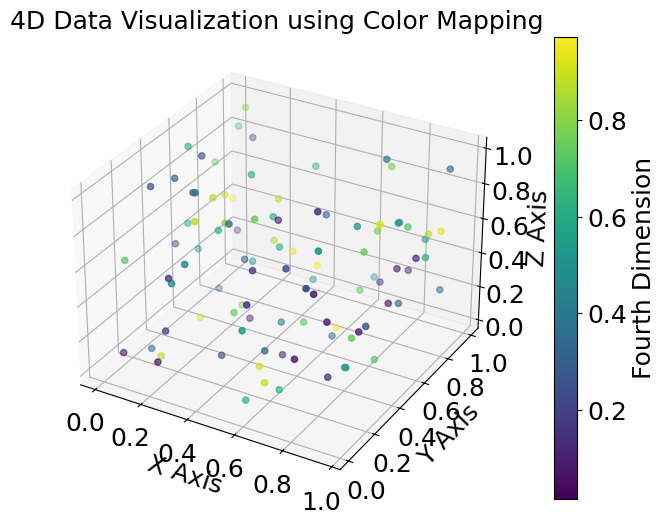

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random 4D data
n = 100
data = np.random.rand(n, 4)

# Split data into 4 dimensions
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
color = data[:, 3]  # Fourth dimension

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=color, cmap='viridis')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Fourth Dimension')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('4D Data Visualization using Color Mapping')
plt.show()


Combined data shape: (2190, 2762)
Combined parameters shape: (2190, 2)
Loaded data from files with PS computation: ps shape=(219, 1382)
Shape of PS data after binning=(2190, 16)
(219, 1382) (219, 1382) (219, 2)
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.5167608857154846, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-1.0
Plotting xHI=0.1063900887966156, logfX=-

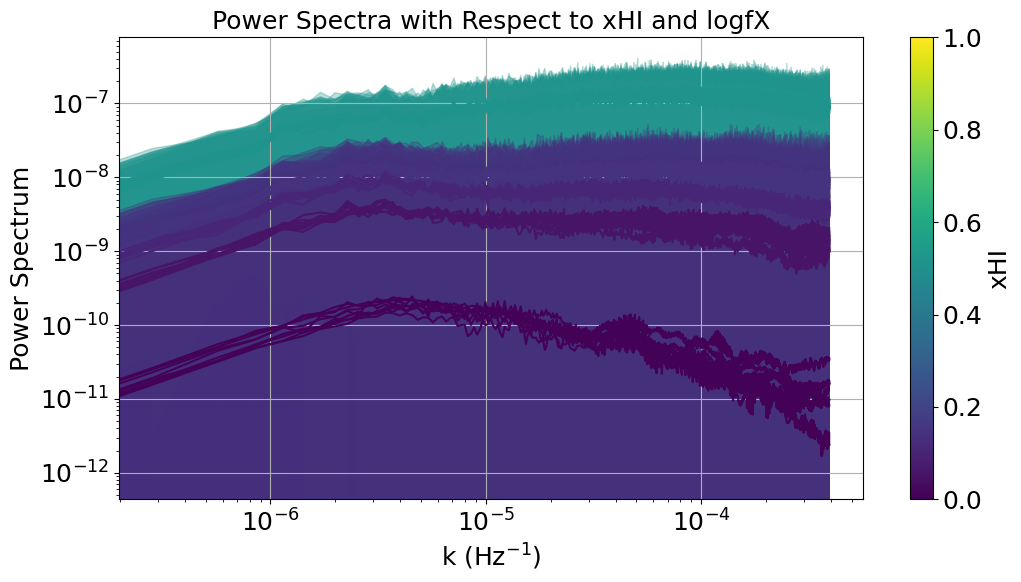

In [37]:
params10so_b100, freq10so_b100, los10so_b100, ps10so_b100, ks10so_b100, psstd10so_b100 = load_dataset(files10so, psbatchsize=100, limitsamplesize=1000, ps_bins=None)
print(f"Loaded data from files with PS computation: ps shape={ps10so.shape}")
ks10so_bin_b100, ps10so_bin_b100 = f21stats.logbin_power_spectrum_by_k(ks10so_b100, ps10so_b100)
print(f"Shape of PS data after binning={ps10so_bin_b100.shape}")

# Create the plot
base.initplt()

# Create a colormap for logfX
cmap = cm.get_cmap('viridis') 

# Create a scatter plot to hold the color mapping
sc = plt.scatter([], [], c=[], cmap=cmap, vmin=0, vmax=1, alpha=1)  # Placeholder for colorbar

ks = ks10so[0]
print(f"{psstd10so.shape} {ps10so.shape} {params10so.shape}")
for i, (ps, psstd, params) in enumerate(zip(ps10so_b100, psstd10so_b100, params10so_b100)):
    xHI = params[0]
    logfX = params[1]
    if xHI > 0.53: continue
    if logfX > -0.9: continue
    if xHI > 0.15 and xHI < 0.5: continue
    print(f"Plotting xHI={xHI}, logfX={logfX}")
    plt.plot(ks, ps, color=cmap(xHI), alpha=1)
    plt.fill_between(ks, ps - psstd, ps + psstd, color=cmap(xHI), alpha=0.3) 


plt.title('Power Spectra with Respect to xHI and logfX')
plt.xlabel('k (Hz$^{-1}$)')
plt.ylabel('Power Spectrum')
plt.xscale('log')  # Optional: log scale for x-axis
plt.yscale('log')  # Optional: log scale for y-axis
plt.colorbar(sc, label='xHI')  # Add colorbar with label

plt.grid()
plt.show()